# Correlation function of DR72 SDSS VAGC Catalog

First import all the modules such as healpy and astropy needed for analyzing the structure

In [1]:
import healpix_util as hu
import astropy as ap
import numpy as np
from astropy.io import fits
from astropy.table import Table
import astropy.io.ascii as ascii
from astropy.io import fits
from astropy.constants import c
import matplotlib.pyplot as plt
import math as m
from math import pi
import scipy.special as sp
from scipy import integrate
import warnings
from sklearn.neighbors import BallTree
import pickle
import pymangle
%matplotlib inline

In [2]:
dr7full=ascii.read("./input/DR7-Full.ascii")
dr7full

col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12
float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64
56.1604523761,-0.221359772462,0.4501842,-22.0970516205,0.9943343,0.310859,1.7112147,1.0,0.9901478,32763,33480,784
58.247844859,0.216329004672,0.3671646,-21.8688602448,0.9533011,0.7922078,0.9208817,1.0,0.9506173,303471,311902,3790
54.445380928,0.619974218725,0.4133244,-21.7306137085,1.0,0.4315305,1.4082278,1.0,0.9183673,43630,44552,779
54.4879828915,0.485825651457,0.3224697,-21.8775806427,1.0,0.9240486,0.8174705,1.0,0.9183673,43622,44544,779
54.4932987631,0.483249792951,0.3226457,-21.6763000488,1.0,0.9249313,0.8168564,1.0,0.9183673,43622,44544,779
55.5558858448,0.582441686132,0.2334688,-21.5131568909,0.9943343,1.0009493,0.7672175,1.0,0.9901478,43723,44650,784
55.5686146471,0.608277412471,0.3136448,-21.5073776245,0.9943343,0.8425107,0.8784812,1.0,0.9901478,43727,44654,784
55.5972002797,0.434026434704,0.3517163,-21.5829257965,0.9943343,0.8903325,0.8416406,1.0,0.9901478,43731,44658,784
55.7617273511,0.495315330472,0.403208,-21.3501148224,0.9943343,0.4957986,1.2868758,1.0,0.9901478,43740,44667,784


In [10]:
z=dr7full['col3']
rad=dr7full['col1']
decd=dr7full['col2']

In [7]:
#Ez = lambda x: 1.0/m.sqrt(0.3*(1+x)**3+0.7)
Om=0.3
Ol=0.7
Ok=0.0
def Ez(zv):
    return 1.0/m.sqrt(Om*(1.0+zv)**3+Ok*(1.0+zv)**2+Ol)

np.vectorize(Ez)
#Calculate comoving distance of a data point using the Redshift - This definition is based on the cosmology model we take. Here the distance for E-dS universe is considered. Also note that c/H0 ratio is cancelled in the equations and hence not taken.

In [8]:
def DC_LCDM(z):
  return integrate.quad(Ez, 0, z)[0]
DC_LCDM=np.vectorize(DC_LCDM)

In [9]:
DC_LCDM(2.0)

array(1.20947120427111)

In [11]:
DC=DC_LCDM(z)
DC

0.402352474282
0.335419291795
0.373032638536
0.298038494099
0.298187560536
0.220751783751
0.290545079047
0.322606521262
0.364874955446
0.343444015506
0.162121950353


In [12]:
dr7f = open("./output/DR72srarf.dat",'w')
dr7f.write("z\t ra\t dec\t s\t rar\t decr \n")

for i in range(0,len(dr7full)):
    dr7f.write("%f\t " %z[i])
    dr7f.write("%f\t %f\t " %(rad[i],decd[i]))
    dr7f.write("%f\t " %DC[i])
    dr7f.write("%f\t %f\n " %(rad[i]*pi/180.0,decd[i]*pi/180.0))
dr7f.close()

In [14]:
data=ascii.read("./output/DR72srarf.dat")

In [3]:
data['z']

0.450184
0.367165
0.413324
0.32247
0.322646
0.233469
0.313645
0.351716
0.403208
0.37691
0.168714


In [4]:
data['ra']

56.160452
58.247845
54.445381
54.487983
54.493299
55.555886
55.568615
55.5972
55.761727
55.812512
55.870851


In [5]:
data['dec']

-0.22136
0.216329
0.619974
0.485826
0.48325
0.582442
0.608277
0.434026
0.495315
0.521042
0.4937


In [6]:
def DC_LC(z):
    return np.log(1+z)

In [7]:
DCLC=DC_LC(data['z'])

In [8]:
DCLC

0.371690444934
0.312739252726
0.34594437678
0.279501200183
0.279634275632
0.209830524933
0.272805716133
0.301374896384
0.338761043874
0.319841858133
0.155903999007


In [10]:
d=ascii.read("./output/DR72LCsrarf.dat")

In [11]:
d

z,ra,dec,s,rar,decr
float64,float64,float64,float64,float64,float64
0.450184,56.160452,-0.22136,0.37169,0.980185,-0.003863
0.367165,58.247845,0.216329,0.312739,1.016617,0.003776
0.413324,54.445381,0.619974,0.345944,0.950251,0.010821
0.32247,54.487983,0.485826,0.279501,0.950995,0.008479
0.322646,54.493299,0.48325,0.279634,0.951087,0.008434
0.233469,55.555886,0.582442,0.209831,0.969633,0.010166
0.313645,55.568615,0.608277,0.272806,0.969855,0.010616
0.351716,55.5972,0.434026,0.301375,0.970354,0.007575
0.403208,55.761727,0.495315,0.338761,0.973226,0.008645


In [12]:
dataR=ascii.read("./output/rand200kdr72.dat")

In [13]:
dataR['z']

0.450184
0.367165
0.413324
0.32247
0.322646
0.233469
0.313645
0.351716
0.403208
0.37691
0.168714


In [14]:
dataR['ra']

171.460447
156.861634
135.655956
151.1135
327.045321
222.706587
132.163348
214.239217
310.627283
143.795051
168.941476


In [15]:
dataR['dec']

14.210816
40.750823
19.592957
24.245002
-7.737766
21.927202
15.281744
5.973424
1.01386
15.993848
43.319462


In [16]:
DCLCR=DC_LC(dataR['z'])

In [17]:
rdr7f = open("./output/rDR7200kLCsrarf.dat",'w')
rdr7f.write("z\t ra\t dec\t s\t rar\t decr \n")

for i in range(0,len(dataR)):
    rdr7f.write("%f\t " %dataR['z'][i])
    rdr7f.write("%f\t %f\t " %(dataR['ra'][i],dataR['dec'][i]))
    rdr7f.write("%f\t " %DCLCR[i])
    rdr7f.write("%f\t %f\n " %(dataR['ra'][i]*pi/180.0,dataR['dec'][i]*pi/180.0))
rdr7f.close()

In [19]:
r=ascii.read("./output/rDR7200kLCsrarf.dat")

In [20]:
r

z,ra,dec,s,rar,decr
float64,float64,float64,float64,float64,float64
0.450184,171.460447,14.210816,0.37169,2.992549,0.248026
0.367165,156.861634,40.750823,0.312739,2.737752,0.711236
0.413324,135.655956,19.592957,0.345944,2.367643,0.341962
0.32247,151.1135,24.245002,0.279501,2.637428,0.423155
0.322646,327.045321,-7.737766,0.279634,5.708018,-0.135049
0.233469,222.706587,21.927202,0.209831,3.886963,0.382702
0.313645,132.163348,15.281744,0.272806,2.306686,0.266717
0.351716,214.239217,5.973424,0.301375,3.73918,0.104256
0.403208,310.627283,1.01386,0.338761,5.421469,0.017695


In [180]:
dr7fdat=ascii.read("./output/DR7srarf.dat")

In [181]:
dr7fdat['s'][1:300]

0.335419
0.373033
0.298038
0.298188
0.220752
0.290545
0.322606
0.364875
0.343444
0.162122
0.280303


In [19]:
#fdata=fits.open("/Users/rohin/Downloads/DR7-Full.fits")

In [20]:
#fdata.writeto("./output/DR7fulltrim.fits")

In [70]:
fdata=fits.open("./output/DR7fulltrim.fits")

In [71]:
cols=fdata[1].columns

In [72]:
cols.del_col('ZTYPE')

ColDefs(
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'Z'; format = 'E'
    name = 'SECTOR'; format = 'J'
    name = 'FGOTMAIN'; format = 'E'
    name = 'QUALITY'; format = 'J'
    name = 'ISBAD'; format = 'J'
    name = 'M'; format = 'E'
    name = 'MMAX'; format = 'E'
    name = 'ILSS'; format = 'J'
    name = 'ICOMB'; format = 'J'
    name = 'VAGC_SELECT'; format = 'J'
    name = 'LSS_INDEX'; format = 'J'
    name = 'FIBERWEIGHT'; format = 'D'
    name = 'PRIMTARGET'; format = 'D'
    name = 'MG'; format = 'D'
    name = 'SECTOR_COMPLETENESS'; format = 'E'
    name = 'COMOV_DENSITY'; format = 'E'
    name = 'RADIAL_WEIGHT'; format = 'E'
)

In [73]:
cols.del_col('SECTOR')
cols.del_col('FGOTMAIN')
cols.del_col('QUALITY')
cols.del_col('ISBAD')
cols.del_col('M')
cols.del_col('MMAX')
cols.del_col('ILSS')
cols.del_col('ICOMB')
cols.del_col('VAGC_SELECT')
cols.del_col('LSS_INDEX')
cols.del_col('FIBERWEIGHT')
cols.del_col('PRIMTARGET')
cols.del_col('MG')
cols.del_col('SECTOR_COMPLETENESS')
cols.del_col('COMOV_DENSITY')
cols.del_col('RADIAL_WEIGHT')

ColDefs(
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'Z'; format = 'E'
)

In [74]:
fdata[1].columns

ColDefs(
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'Z'; format = 'E'
)

In [75]:
fdata.writeto("./output/DR7fullzradec.fits")

IOError: File './output/DR7fullzradec.fits' already exists.

In [166]:
fdat=fits.open("./output/DR7fullzradec.fits")

In [154]:
fdat[1].columns

ColDefs(
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'Z'; format = 'E'
)

In [128]:
fdat[1].data['Z']

array([  4.50184196e-01,   0.00000000e+00,   4.20389539e-45, ...,
         0.00000000e+00,   9.20399129e-01,   3.78571361e-01], dtype=float32)

In [173]:
fdat[1].data['RA']

array([  5.61604524e+001,   7.19673559e-003,   6.36598766e-314, ...,
        -1.49166850e-154,   4.32171670e-281,   9.01242404e+007])

In [129]:
comovlcdm=DC_LCDM(fdat[1].data['Z'])

In [130]:
fdat[1].data['Z']

array([  4.50184196e-01,   0.00000000e+00,   4.20389539e-45, ...,
         0.00000000e+00,   9.20399129e-01,   3.78571361e-01], dtype=float32)

In [131]:
comovlcdm

array([  4.02352471e-01,   0.00000000e+00,   4.20389539e-45, ...,
         0.00000000e+00,   7.25151263e-01,   3.44807467e-01])

In [119]:
comovlcdm.dtype

dtype('float64')

In [96]:
#cols=fdat[1].columns

In [155]:
nc=fits.Column(name='COMOV',format='D',array=comovlcdm)

In [163]:
nc1=fits.Column(name='COMOV',format='D')

In [174]:
fdata[1].data['Z']

array([  4.50184196e-01,   1.76200008e+01,   1.60000019e+01, ...,
         3.49009275e+00,   8.79396975e-01,   4.20389539e-45], dtype=float32)

In [175]:
fdata[1].data['RA']

array([  5.61604524e+001,   7.19673559e-003,   6.36598766e-314, ...,
        -1.49166850e-154,   4.32171670e-281,   9.01242404e+007])

In [156]:
nc

name = 'COMOV'; format = 'D'

In [157]:
nc.dtype

dtype('float64')

In [158]:
#cols.add_col(nc)

In [159]:
fdat[1].columns

ColDefs(
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'Z'; format = 'E'
)

In [162]:
fdat[1].columns.info()

name:
    ['RA', 'DEC', 'Z', 'COMOV']
format:
    ['D', 'D', 'E', 'D']
unit:
    ['', '', '', '']
null:
    ['', '', '', '']
bscale:
    ['', '', '', '']
bzero:
    ['', '', '', '']
disp:
    ['', '', '', '']
start:
    ['', '', '', '']
dim:
    ['', '', '', '']


In [167]:
fdat[1].columns.add_col(nc1)

ColDefs(
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'Z'; format = 'E'
    name = 'COMOV'; format = 'D'
)

In [169]:
fdat[1].data['COMOV']=comovlcdm

In [138]:
comovlcdm

array([  4.02352471e-01,   0.00000000e+00,   4.20389539e-45, ...,
         0.00000000e+00,   7.25151263e-01,   3.44807467e-01])

In [88]:
fdat[1].data['Z']

array([  4.50184196e-01,   1.76200008e+01,   1.60000019e+01, ...,
         3.49009275e+00,   8.79396975e-01,   4.20389539e-45], dtype=float32)

In [170]:
fdat[1].data['COMOV']

array([  4.02352471e-01,   0.00000000e+00,   4.20389539e-45, ...,
         0.00000000e+00,   7.25151263e-01,   3.44807467e-01])

In [171]:
fdat[1].data['RA']

array([  5.61604524e+001,   7.19673559e-003,   6.36598766e-314, ...,
        -1.49166850e-154,   4.32171670e-281,   9.01242404e+007])

In [ ]:
fdat[1].data['RA']=fdat[1].data['RA']*pi/180.0

In [89]:
comovlcdm=DC_LCDM(fdat[1].data['Z'])
comovlcdm

ValueError: math domain error

Random catalog created based on the survey limitations also taken from http://cosmo.nyu.edu/~eak306/SDSS-LRG.html

In [46]:
dataR=fits.open("/Users/rohin/Downloads/random-DR7-Full.fits")

In [47]:
dataR

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x10e515710>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x10daf7c50>]

In [48]:
dataR=dataR[1].data

In [49]:
len(dataR)

1664948

In [19]:
NSIDE=512
dr72hpix=hu.HealPix("ring",NSIDE)

In [20]:
pixdata = open("./output/pixdatadr72VAGCfullrand.dat",'w')
pixdata.write("z\t pix \n")

for i in range(0,len(data)-1):
    pixdata.write("%f\t" %data['z'][i])
    pixdata.write("%d\n" %dr72hpix.eq2pix(dataR['ra'][i],dataR['dec'][i]))
pixdata.close()

In [21]:
pixdata = ascii.read("./output/pixdatadr72VAGCfullrand.dat")
hpixdata=np.array(np.zeros(hu.nside2npix(NSIDE)))
for j in range(len(pixdata)):
    hpixdata[pixdata[j]['pix']]+=1

In [22]:
hpixdata

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

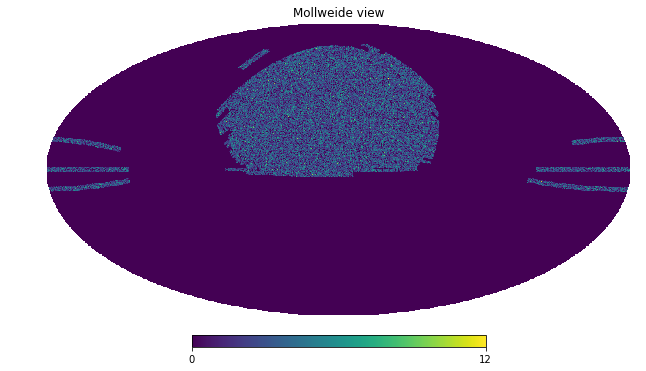

In [23]:
hu.mollview(hpixdata,rot=180)

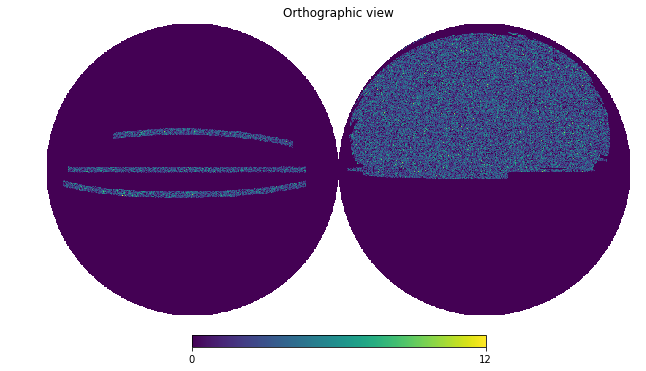

In [24]:
hu.orthview(hpixdata)